In [56]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas_profiling
import copy
from sklearn.decomposition import PCA
import sklearn.metrics
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [57]:
df=pd.read_csv("online_shoppers_intention.csv")
df=df.dropna()

In [58]:
X=df.copy()
X=pd.get_dummies(X, columns=["Month","OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType"] )
nums=["Administrative", "Administrative_Duration", 
      "Informational", "Informational_Duration", 
      "ProductRelated", "ProductRelated_Duration",
     "BounceRates", "ExitRates", "PageValues", "SpecialDay"] 

df_scale=X.copy()
df_scale

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [59]:
scaler = StandardScaler()
df_scale[nums]=(df_scale[nums]-df_scale[nums].mean())/df_scale[nums].std() 
df_scale

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.697553,-0.457458,-0.396615,-0.245029,-0.691473,-0.624767,3.672477,3.235240,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
1,-0.697553,-0.457458,-0.396615,-0.245029,-0.668997,-0.591336,-0.457439,1.174544,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
2,-0.697553,-0.463112,-0.396615,-0.252130,-0.691473,-0.625290,3.672477,3.235240,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
3,-0.697553,-0.457458,-0.396615,-0.245029,-0.668997,-0.623374,0.575040,1.998823,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
4,-0.697553,-0.457458,-0.396615,-0.245029,-0.489182,-0.296984,-0.044447,0.144196,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.205312,0.362398,-0.396615,-0.245029,0.477320,0.307022,-0.309942,-0.287919,0.341576,-0.309001,...,0,0,0,0,0,0,0,0,0,1
12326,-0.697553,-0.457458,-0.396615,-0.245029,-0.601566,-0.381476,-0.457439,-0.446536,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
12327,-0.697553,-0.457458,-0.396615,-0.245029,-0.579089,-0.528522,1.263359,0.899785,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1
12328,0.506267,-0.033395,-0.396615,-0.245029,-0.376798,-0.444029,-0.457439,-0.452321,-0.317363,-0.309001,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, linkage, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

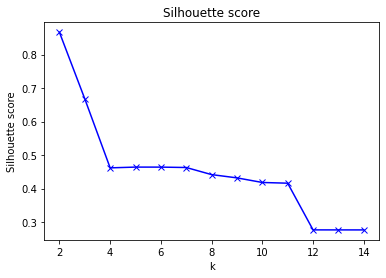

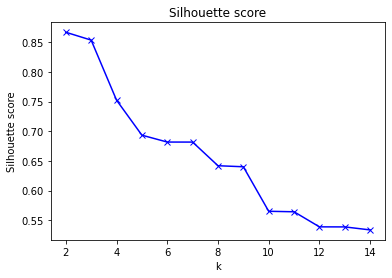

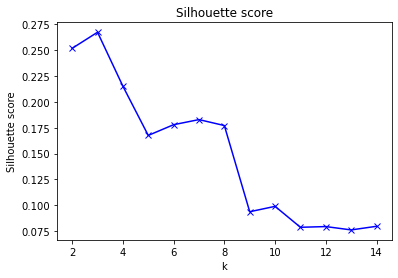

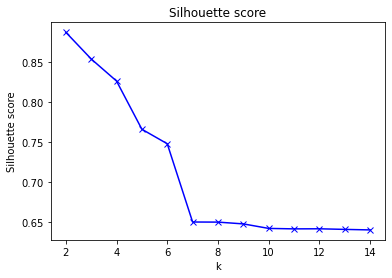

In [61]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 15) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
for linkage in {'ward', 'complete', 'average', 'single'}:
    silhouette_vec = count_clustering_scores(df_scale, cluster_num_seq, linkage, silhouette_score)
    plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title("Silhouette score")
    plt.show()

In [62]:
# A w praktyce wygląda to tak:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

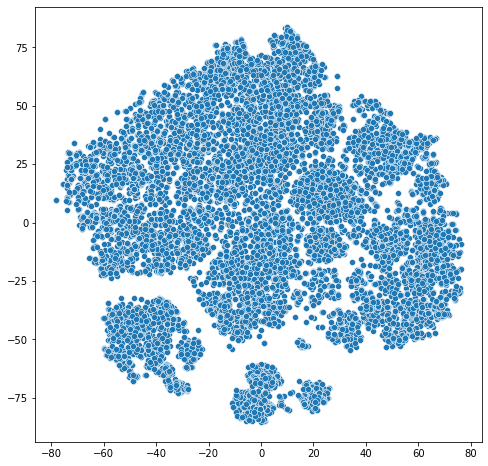

In [63]:
tsne = TSNE(n_components=2, perplexity=35, random_state=40)
coordsFIN=tsne.fit_transform(df_scale)
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o')

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

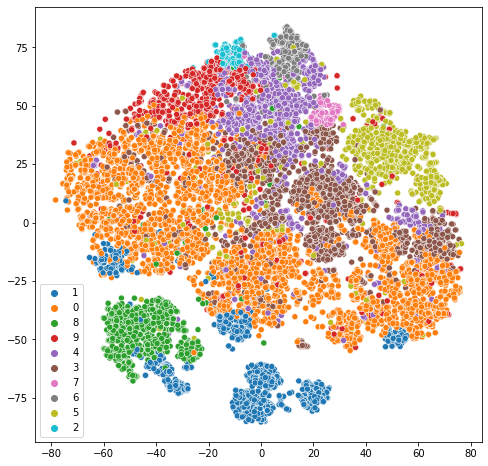

In [64]:
ac=AgglomerativeClustering(n_clusters=10)
arr=ac.fit_predict(df_scale)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst)

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

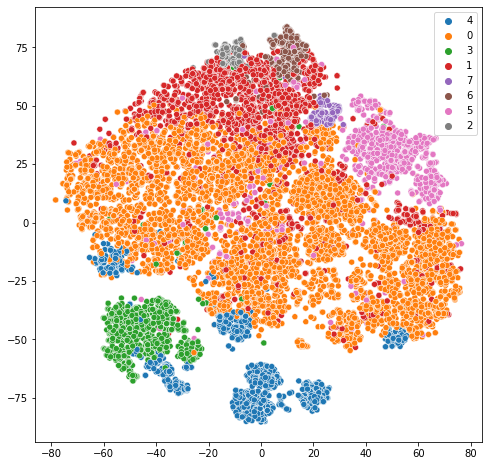

In [65]:
ac=AgglomerativeClustering(n_clusters=8)
arr=ac.fit_predict(df_scale)
lst=[]
for i in range(len(arr)):
    lst.append(str(arr[i]))
plt.figure(figsize=(8,8))
sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst)

In [68]:
from sklearn.decomposition import PCA
def PCA_fun(n):
    pca = PCA(n_components=n)
    pC = pca.fit_transform(df_scale)
    ac=AgglomerativeClustering(n_clusters=8)
    arr=ac.fit_predict(pC)
    lst=[]
    for i in range(len(arr)):
        lst.append(str(arr[i]))
    plt.figure(figsize=(8,8))
    sns.scatterplot(coordsFIN[:, 0], coordsFIN[:, 1], marker = 'o', hue=lst).set_title(f"After {n}d PCA")

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


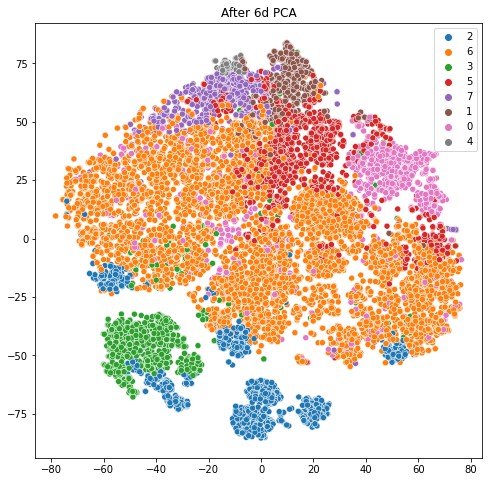

In [69]:
PCA_fun(6)

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


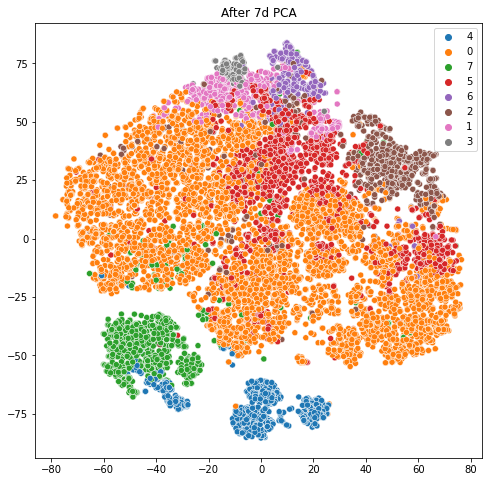

In [70]:
PCA_fun(7)

C:\Users\Jan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


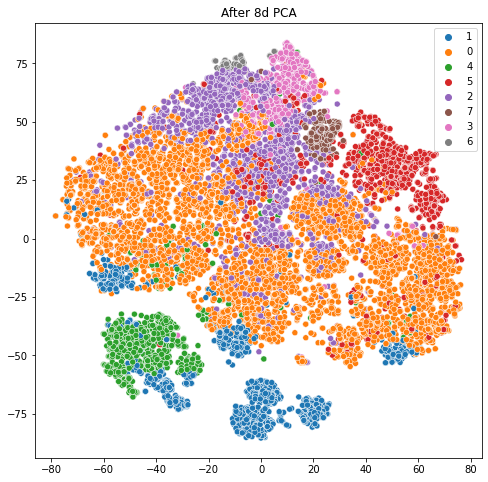

In [71]:
PCA_fun(8)

In [ ]:
X